https://www.kaggle.com/ajay1735/hmeq-data/data
https://docs.google.com/presentation/d/1_hiJQsbXHhrzlXxCtPUSpt9-FvMWNlNw1m6cBVPyGCE/edit#slide=id.g5d2e5310d6_0_4029
https://www.youtube.com/watch?v=6M2d2n-QXCc
https://github.com/arrayslayer/pydata-imbalanced

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
credit = pd.read_csv('hmeq.csv')
credit.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [3]:
df = pd.read_csv('hmeq.csv')
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [4]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


Notice imbalanced data

0    4771
1    1189
Name: BAD, dtype: int64


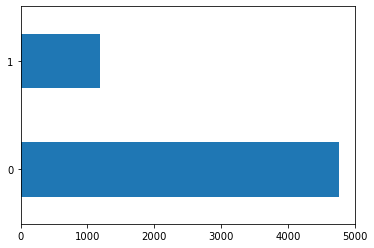

In [8]:
print(df["BAD"].value_counts())
df["BAD"].value_counts().plot(kind="barh")

Inputing the input variables

In [9]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

Observations :
- Except in the case of DEBTINC, in all other cases only few values were not reported
- For imputing the missing values we can think of few ideas like :
 - In case of nominal features, replacing them with the majority class
 - In case of numeric variables like DEROG and DELINQ,most of the cases are 0.We can replace these with majority class.
 - In case of other numerical inputs , we can replace them by median or mean without modifying the much.In this notebook I am going to replace them by mean of the respective column.

In [10]:
# Nominal features
# Replacement using majority class
# majority class in case of JOB variable is Other
# majority class in case of REASON varibale is DebtCon

df["REASON"].fillna(value = "DebtCon",inplace = True)
df["JOB"].fillna(value = "Other",inplace = True)
df["DEROG"].fillna(value=0,inplace=True)
df["DELINQ"].fillna(value=0,inplace=True)

In [12]:
# Numeric features
# Replacement using mean of each class

df.fillna(value=df.mean(),inplace=True)

In [13]:
df.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

Applying the models on the data after imputation
- Applying the basic Classification on the data after replacement/imputation.Lets check the performnace by applying both Logistic Regression and Decision tree algorithms.
- Before applying the algorithms, The data is split into training and testing sets in the ratio 2:1 that is test data 33% and train data 67%.
- And also taking all the columns except JOB,REASON as input features(as they are nominal features, they must be transformed to other variables to be usable which is taken care of in next section).

In [14]:
X = df.drop(columns=["BAD","JOB","REASON"])
y = df["BAD"]

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [23]:
from xgboost import XGBClassifier

In [24]:
xgb = XGBClassifier(seed=42)

In [25]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [26]:
print(f1_score(y_test,xgb.predict(X_test)))
print(accuracy_score(y_test,xgb.predict(X_test)))

0.7574468085106384
0.913065582104728


Not that great, right? We achieve a decent f1 score and a pretty high accuracy (Sounds good, doesn't work!). Let us now see how much of a difference does using scale_pos_weight to balance out the effect of skewed classes has on this

In [27]:
class_weight = int(y_train.value_counts()[0]/y_train.value_counts()[1])

In [28]:
class_weight

4

In [29]:
xgb = XGBClassifier(scale_pos_weight=class_weight,seed=42)

In [30]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=4, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [31]:
print(f1_score(y_test,xgb.predict(X_test)))
print(accuracy_score(y_test,xgb.predict(X_test)))

0.7903871829105474
0.9201830198271479


Wow, that worked! We just made quite a leap in the f1 score! That really did do wonders. The accuracy also improved a tad, but we don't really want to read too much into the accuracy because it is a useless metric here. Why don't we take a little detour and show how useless accuracy really is here.

In [32]:
print(accuracy_score(y_test,[0 for i in range(len(X_test)) ] ))

0.800711743772242


We just predicted all zeros(!) {the majority class} without any sort of model, and that gave us an accuracy of 89. Now we know why we don't need accuracy here.